### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla\cdot \boldsymbol{D}  = {0}$

 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \biggl(\mathbb{C}_{mod} \boldsymbol{\epsilon} -\mathbb{e}_{mod}^T\boldsymbol{E}\biggr) $

$\boldsymbol{D} = \biggr({\boldsymbol{K}_{mod}\boldsymbol{E}} +  \mathbb{e}_{mod}\boldsymbol{\epsilon}\biggl) $

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon} + \boldsymbol{E} \cdot \boldsymbol{K}\boldsymbol{E} + \boldsymbol{\epsilon}:\mathbb{e}^T\boldsymbol{E}\biggr)$

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

$\mathbb{e}_{mod} = s^2 \mathbb{e}$

$\boldsymbol{K}_{mod} = s^2 \boldsymbol{K}$

 # Weak Form

### For Piezo-elasticity part

 $a((\boldsymbol{u},\phi), ({\boldsymbol{v}},{\psi})) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega - \int_\Omega \bigl ( \boldsymbol{e}_{mod}^T\boldsymbol{E}:\nabla \boldsymbol{v}\bigr)d\Omega + \int_{\Omega}\left(\boldsymbol{K}_{mod}\boldsymbol{E} \cdot \nabla \boldsymbol{\psi}\right) + \int_{\Omega}\left(\mathbb{e}_{mod}\boldsymbol{\epsilon}  \cdot \nabla  \boldsymbol{\psi}\right)d\Omega$

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.TensorValues
using PyPlot

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [2]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/3)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [3]:
const L = 25.5      #Length
const H = 19.1      #Height
const Lu = 4.6      #offset of load from left end
const Lh = 11.5     #notch length
const lsp = 0.08    #length factor
const CP = H/2      #center height  
const CH = 0.46     #Crack height
const hf = 0.06/2.1    #finer mesh size
const hfc = 0.06/50    #finer mesh size
const h = 60*hf     #coarser mesh size
const Lw = 2*h         #load width
const FMR = CH/2 

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)  
p2 = gmsh.model.geo.addPoint(Lu-0.5*Lw, 0.0, 0.0, h)
p3 = gmsh.model.geo.addPoint(Lu+0.5*Lw, 0.0, 0.0, h) 
p4 = gmsh.model.geo.addPoint(L, 0, 0.0, h) 
p5 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p6 = gmsh.model.geo.addPoint(Lu+0.5*Lw, H, 0.0, h)
p7 = gmsh.model.geo.addPoint(Lu-0.5*Lw, H, 0.0, h)
p8 = gmsh.model.geo.addPoint(0, H, 0.0, h)
p9 = gmsh.model.geo.addPoint(0, CP + (CH*0.5), 0.0, h)
p10 = gmsh.model.geo.addPoint(Lh-(CH*0.5), CP + (CH*0.5), 0.0, h)
p11 = gmsh.model.geo.addPoint(Lh, CP, 0.0, hfc)
p12 = gmsh.model.geo.addPoint(Lh-(CH*0.5), CP - (CH*0.5), 0.0, h)
p13 = gmsh.model.geo.addPoint(0, CP - (CH*0.5), 0.0, h)

pp14 = gmsh.model.geo.addPoint(L, CP, 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p13)
l13 = gmsh.model.geo.addLine(p13, p1)

ll1 = gmsh.model.geo.addLine(p11, pp14)

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13])

ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])
pg2 = gmsh.model.addPhysicalGroup(1, [l2])
pg3 = gmsh.model.addPhysicalGroup(1, [l6])
pg4 = gmsh.model.addPhysicalGroup(1, [l7,l6,l5])
pg5 = gmsh.model.addPhysicalGroup(1, [l1,l2,l3])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(1, pg2, "DirichletBot")
gmsh.model.setPhysicalName(1, pg3, "DirichletTop")
gmsh.model.setPhysicalName(1, pg4, "ElectricPotentialTop")
gmsh.model.setPhysicalName(1, pg5, "ElectricPotentialBot")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", 0.95*Lh)
gmsh.model.mesh.field.setNumber(11, "XMax", L)
gmsh.model.mesh.field.setNumber(11, "YMin", CP-4*FMR)
gmsh.model.mesh.field.setNumber(11, "YMax", CP+4*FMR)

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [ll1])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", hf)
gmsh.model.mesh.field.setNumber(2, "LcMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 4*FMR)
gmsh.model.mesh.field.setNumber(2, "DistMax", 1)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("PlateWithEdgeNotch.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Line)
Info    : Meshing curve 13 (Line)
Info    : Meshing curve 14 (Line)
Info    : Done meshing 1D (0.022783 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Delaunay)
Info    : Done meshing 2D (1.97316 s)
Info    : 34436 vertices 68375 elements
Info    : Writing 'PlateWithEdgeNotch.msh'...
Info    : Done writing 'PlateWithEdgeNotch.msh'


In [4]:
model = GmshDiscreteModel("PlateWithEdgeNotch.msh")
writevtk(model,"PlateWithEdgeNotch")

Info    : Reading 'PlateWithEdgeNotch.msh'...
Info    : 29 entities
Info    : 33927 nodes
Info    : 67748 elements
Info    : Done reading 'PlateWithEdgeNotch.msh'


3-element Vector{Vector{String}}:
 ["PlateWithEdgeNotch_0.vtu"]
 ["PlateWithEdgeNotch_1.vtu"]
 ["PlateWithEdgeNotch_2.vtu"]

In [5]:
ElecF = -3
phiMaxApp = (ElecF/10)*H*1e3
thickness = 5.1

5.1

In [6]:
cd("ResultNotchedPlateElecField$ElecF")

In [7]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

67716-element Vector{Int8}:
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [8]:
const Mat_tag = get_tag_from_name(labels,"Domain")

5

## Input paramters for Piezo-Electric Material Properties

#### Input elasticity parameters

In [9]:
const λ_mat = 77.8e3 
const μ_mat = 30.6e3

30600.0

#### Input piezo-electric parameters

#### Input permitivity parameters

In [10]:
const K₁₁_mat = 6e-9
const K₂₂_mat = 6e-9

6.0e-9

#### Input fracture parameters

In [11]:
const Gc = 7e-3
const η = 1e-10

1.0e-10

## COnstitutive Matrices

### Elastic stiffness tensor

### Third order piezoelectric tensor

In [12]:
p = VectorValue(0,1)
I = [1 0; 0 1]
K1 = zeros(2,2,2)
K2 = zeros(2,2,2)
K3 = zeros(2,2,2)
C1 = -6.98e-3
C2 = -6.06e-3
C3 = 16.00e-3
for i = 1:2, j = 1:2, k= 1:2
    K1[i,j,k] = p[i]*I[j,k]
end
for i = 1:2, j = 1:2, k= 1:2
    K2[i,j,k] = p[i]*p[j]*p[k]
end
for i = 1:2, j = 1:2, k= 1:2
    K3[i,j,k] = 0.5*(p[j]*I[i,k] + p[k]*I[i,j])
end
K = C1*K1+C2*K2+C3*K3
K[1,:,:]

2×2 Matrix{Float64}:
 0.0    0.008
 0.008  0.0

In [13]:
vals = zeros(2,2,2);
    vals[1,:,:] .= K[1,:,:]
    vals[2,:,:] .= K[2,:,:]
const e_mat = ThirdOrderTensorValue(vals ...)

ThirdOrderTensorValue{2, 2, 2, Float64, 8}(0.0, -0.00698, 0.008, 0.0, 0.008, 0.0, 0.0, 0.002960000000000001)

### Second order electrical permittivity tensor

In [14]:
const K_mat = TensorValue(K₁₁_mat,0.0,0.0, K₁₁_mat)

TensorValue{2, 2, Float64, 4}(6.0e-9, 0.0, 0.0, 6.0e-9)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

In [15]:
σ_elas(ε) = λ_mat*tr(ε)*one(ε) + 2*μ_mat*ε

function σ_elasMod(ε, ε_in, s_in)  
 if tr(ε_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(ε)
  elseif tr(ε_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(ε) + I4_vol⊙ σ_elas(ε)
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [16]:
σ_piezo(∇) = ∇ ⋅ e_mat

σ_piezoMod(∇, ∇_in, s_in) = (s_in^2 + η)*σ_piezo(∇)

σ_piezoMod (generic function with 1 method)

### Electric Displacement

$\boldsymbol{D}_{elas}(ε(\boldsymbol{u}),tag) = \mathbb{e}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{elasMod}(ε(\boldsymbol{u}),s,tag) = \mathbb{e}_{mod}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\boldsymbol{E}(\phi)) = -\boldsymbol{K}\boldsymbol{E} $

or, $\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

$\boldsymbol{D}_{piezoMod}(\nabla\phi,s)  = \boldsymbol{K}_{mod}\boldsymbol{\nabla} \phi$

In [17]:
D_elasMod(ε, ∇_in, s_in) = (s_in^2 + η)*(e_mat ⋅² ε)

D_elasMod (generic function with 1 method)

In [18]:
D_piezo(∇) = K_mat ⋅ ∇

function D_piezoMod(∇, s_in)   
    return (s_in^2 + η)*D_piezo(∇)
end

D_piezoMod (generic function with 1 method)

In [19]:
function ψPos(ε_in, ∇_in)   
 if tr(ε_in) >= 0
    ψPlus = 0.5*(ε_in ⊙ σ_elas(ε_in)) + 0.5*(σ_piezo(∇_in) ⊙ ε_in)
 elseif tr(ε_in) < 0
    ψPlus = 0.5*((I4_dev ⊙ σ_elas(ε_in)) ⊙ (I4_dev ⊙ ε_in)) + 0.5*(σ_piezo(∇_in) ⊙ (I4_dev ⊙ ε_in))        
 end 
    return ψPlus
end

ψPos (generic function with 1 method)

In [20]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [21]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [22]:
order = 1
degree = 2*order

2

In [23]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [24]:
LoadTagId = get_tag_from_name(labels,"DirichletTop")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 2
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 8690521999222340486

In [25]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 67716
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 11358333469752246961

In [26]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletTop", "DirichletBot"],
          dirichlet_masks=[(false,true), (false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 67716
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 11358333469752246961

In [27]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialTop","ElectricPotentialBot"])

UnconstrainedFESpace()

In [28]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot])

MultiFieldFESpace()

In [29]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [30]:
 function   stepDispElecPot(uh_in,phih_in,sh_in,vApp,phiApp)
    
        uApp1(x) = VectorValue(0.0,vApp)
        uApp2(x) = VectorValue(0.0,-vApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
    
        phiApp1(x) = 0
        phiApp2(x) = phiApp
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot])
    
        a((u,ϕ),(v,ψ)) = ∫( (ε(v) ⊙ (σ_elasMod∘(ε(u),ε(uh_in),sh_in))) + (∇(v) ⊙ (σ_piezoMod ∘(∇(ϕ),∇(phih_in),sh_in))) - (∇(ψ)⋅(D_piezoMod∘ (∇(ϕ),sh_in))) + (∇(ψ)⋅(D_elasMod∘(ε(u),∇(phih_in),sh_in))) )*dΩ
        b((v,ψ)) = 0.0
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = solve(op)
        uh_out,phih_out = uhPhi
    
    return uh_out,phih_out
end

stepDispElecPot (generic function with 1 method)

In [31]:
vApp = 0
phiApp = 0
delv = 1e-4
vAppMax = 0.010
innerMax = 10
count = 0

Load = Float64[]
Displacement = Float64[]

#push!(Load, 0.0)
#push!(Displacement, 0.0)

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)


while vApp .< vAppMax 
    count = count .+ 1
    vApp = vApp .+ delv
    
    if vApp <= 5e-4
        phiApp = vApp * (phiMaxApp/5e-4)
    else
        phiApp = phiMaxApp
    end
    
    if vApp >= 5e-4 && vApp <= 2e-3
        delv = 1e-4
    elseif vApp >= 2e-3
        delv = 1e-4
    end
    
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,ϕh = stepDispElecPot(uh,ϕh,sh,vApp,phiApp)
        
        ψhPos_in = ψPos∘(ε(uh),∇(ϕh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_piezoMod∘(∇(ϕh),∇(ϕh),sh) ) )  *dΓ_Load)
    
    push!(Load, thickness*Node_Force[2])
    push!(Displacement, vApp)
    if mod(count,2) == 0
         writevtk(Ω,"results_NotchedPlate$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])
    end
end


 Entering displacemtent step1 :0.0001
 Relative error = 2.5459796109815345e-17
 Entering displacemtent step2 :0.0002
 Relative error = 7.2754874101616595e-6
 Relative error = 2.1824816912692697e-5
 Relative error = 2.4685024029167305e-9
 Entering displacemtent step3 :0.00030000000000000003
 Relative error = 3.296330882894348e-12
 Entering displacemtent step4 :0.0004
 Relative error = 3.6363730251968694e-5
 Relative error = 5.0892684798265924e-5
 Relative error = 2.287099556350153e-8
 Relative error = 1.232577729548271e-10
 Entering displacemtent step5 :0.0005
 Relative error = 1.593678482959108e-12
 Entering displacemtent step6 :0.0006000000000000001
 Relative error = 6.537386116286079e-5
 Relative error = 4.8803159019735876e-5
 Relative error = 4.059108914240702e-8
 Relative error = 1.0383710454606023e-9
 Entering displacemtent step7 :0.0007000000000000001
 Relative error = 3.4458892062936835e-11
 Entering displacemtent step8 :0.0008000000000000001
 Relative error = 5.748071123747286

 Entering displacemtent step31 :0.0030999999999999986
 Relative error = 1.1960326611442706e-5
 Relative error = 0.00010849640188829962
 Relative error = 1.7123390843590536e-5
 Relative error = 1.5319826315204507e-5
 Relative error = 1.4802238349742041e-5
 Relative error = 1.4524247619282851e-5
 Relative error = 1.4053490818238814e-5
 Relative error = 1.3724932332785447e-5
 Relative error = 1.3485677049179513e-5
 Relative error = 1.32499269717588e-5
 Entering displacemtent step32 :0.0031999999999999984
 Relative error = 1.3011094317111653e-5
 Relative error = 0.00010569452184098542
 Relative error = 1.7727184420946862e-5
 Relative error = 1.6042558873390874e-5
 Relative error = 1.5641853991123455e-5
 Relative error = 1.5171421631559954e-5
 Relative error = 1.4803080925611183e-5
 Relative error = 1.4592714168180526e-5
 Relative error = 1.4389357661311748e-5
 Relative error = 1.3976043116194296e-5
 Entering displacemtent step33 :0.0032999999999999982
 Relative error = 1.3638406126149152e-

 Relative error = 6.488844959522709e-5
 Relative error = 2.26873828532806e-5
 Relative error = 2.1091640116687902e-5
 Relative error = 2.0596170870515722e-5
 Relative error = 2.0219072000371537e-5
 Relative error = 1.9970138736816903e-5
 Relative error = 1.9616559017825997e-5
 Relative error = 1.9268441693501746e-5
 Relative error = 1.8983656916847682e-5
 Entering displacemtent step50 :0.005
 Relative error = 1.870503039487232e-5
 Relative error = 6.248858473047505e-5
 Relative error = 2.245366831163082e-5
 Relative error = 2.0949842313145233e-5
 Relative error = 2.039280784608873e-5
 Relative error = 2.0146168805611467e-5
 Relative error = 1.9799272259422684e-5
 Relative error = 1.9508138453623868e-5
 Relative error = 1.9199347800392148e-5
 Relative error = 1.8876434036064512e-5
 Entering displacemtent step51 :0.0051
 Relative error = 1.856570024059906e-5
 Relative error = 6.081447508065443e-5
 Relative error = 2.2318503049294273e-5
 Relative error = 2.080794928418198e-5
 Relative err

 Relative error = 1.3281471757193233e-5
 Relative error = 1.3047395919351666e-5
 Relative error = 1.2753674596610377e-5
 Relative error = 1.2585060988506221e-5
 Relative error = 1.2329452811462573e-5
 Relative error = 1.1970762765294144e-5
 Entering displacemtent step68 :0.006800000000000005
 Relative error = 1.163801438575867e-5
 Relative error = 2.118242876333309e-5
 Relative error = 1.3064550161516095e-5
 Relative error = 1.2512084192069616e-5
 Relative error = 1.2400506954247665e-5
 Relative error = 1.2092974872063548e-5
 Relative error = 1.1798913867592775e-5
 Relative error = 1.1516618870816804e-5
 Relative error = 1.1412990530842873e-5
 Relative error = 1.117986399272496e-5
 Entering displacemtent step69 :0.006900000000000005
 Relative error = 1.0943526984054495e-5
 Relative error = 1.9484527169605673e-5
 Relative error = 1.2269133627594332e-5
 Relative error = 1.1670333614035736e-5
 Relative error = 1.136949441610359e-5
 Relative error = 1.1124974330244904e-5
 Relative error = 

 Relative error = 3.0481188602071223e-6
 Relative error = 2.9262209195476337e-6
 Entering displacemtent step86 :0.008600000000000003
 Relative error = 2.8049366386310766e-6
 Relative error = 5.597276872829311e-6
 Relative error = 3.513758025853067e-6
 Relative error = 3.2637672285803494e-6
 Relative error = 3.205999770166903e-6
 Relative error = 3.1514565205734634e-6
 Relative error = 3.0573340367170157e-6
 Relative error = 2.917837605579036e-6
 Relative error = 2.7447321122774797e-6
 Relative error = 2.5585531349758124e-6
 Entering displacemtent step87 :0.008700000000000003
 Relative error = 2.386036489318979e-6
 Relative error = 5.009673716524516e-6
 Relative error = 2.957725458171685e-6
 Relative error = 2.64066099882851e-6
 Relative error = 2.5187342730214624e-6
 Relative error = 2.4358310565969423e-6
 Relative error = 2.372389170079176e-6
 Relative error = 2.3182471270638558e-6
 Relative error = 2.2653278594739883e-6
 Relative error = 2.209700448355737e-6
 Entering displacemtent s

In [32]:
 writevtk(Ω,"results_NotchedPlate$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])

(["results_NotchedPlate101.vtu"],)

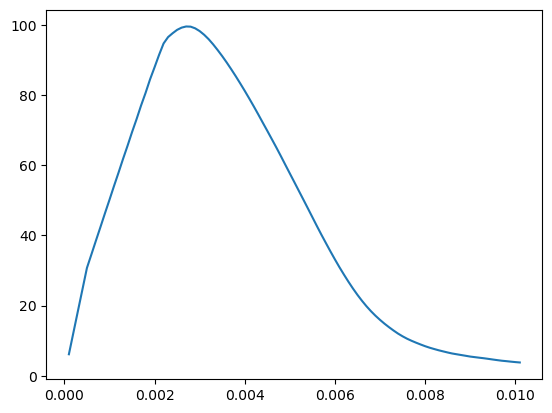

┌ Warning: both Julia and NumPy are linked with MKL, which may cause conflicts and crashes (#433).
└ @ PyCall /home/ayyappan/.julia/packages/PyCall/BD546/src/numpy.jl:73


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6c8f433640>

In [33]:
plot(Displacement,Load)

In [34]:
maximum(Load)

99.54685346106685

In [35]:
cd("../DataLoadDispResultNotchedPlate")

In [36]:
using DelimitedFiles
Disp = writedlm("DispDataResult0mmEccentricNotchedBeam$ElecF.csv",  Displacement, ',')
Force = writedlm("LoadDataResult0mmEccentricNotchedBeam$ElecF.csv",  Load, ',')